In [177]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import normalize

import seaborn as sns

In [21]:
df = pd.read_csv('./data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [180]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ca35a37b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7ca2937b38>]], dtype=object)

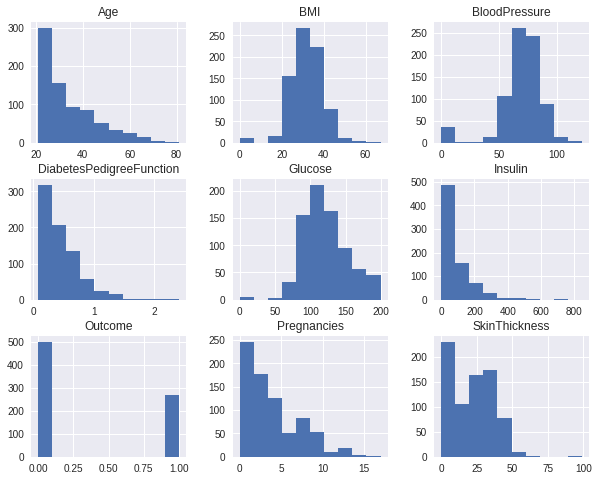

In [181]:
df.hist(figsize=(10,8))

Pregnancies                    Axes(0.125,0.657941;0.227941x0.222059)
Glucose                     Axes(0.398529,0.657941;0.227941x0.222059)
BloodPressure               Axes(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  Axes(0.125,0.391471;0.227941x0.222059)
Insulin                     Axes(0.398529,0.391471;0.227941x0.222059)
BMI                         Axes(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          Axes(0.125,0.125;0.227941x0.222059)
Age                            Axes(0.398529,0.125;0.227941x0.222059)
Outcome                        Axes(0.672059,0.125;0.227941x0.222059)
dtype: object

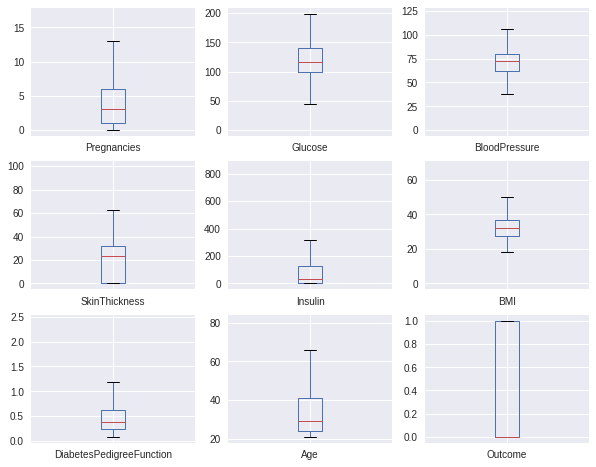

In [183]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

In [140]:
X = df.drop(['Outcome', 'SkinThickness', 'DiabetesPedigreeFunction' ], axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age
0,6,148,72,0,33.6,50
1,1,85,66,0,26.6,31
2,8,183,64,0,23.3,32
3,1,89,66,94,28.1,21
4,0,137,40,168,43.1,33


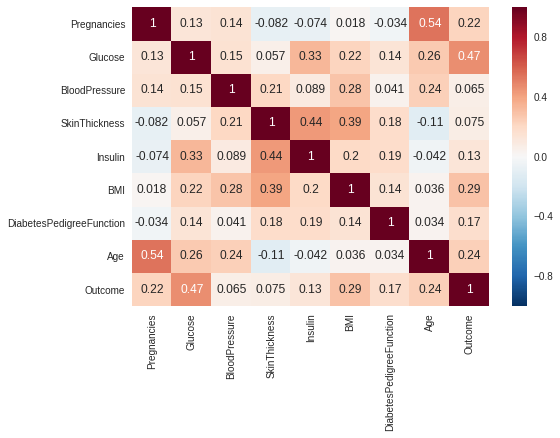

In [184]:
corr = df[df.columns].corr()
sns.heatmap(corr, annot = True)

In [151]:
y= df['Outcome']
y_cat = to_categorical(y)
y_cat[:10]

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [152]:
Xn = normalize(X, norm='l1', axis=0)
Xn[:5]

array([[ 0.00203183,  0.00159402,  0.00135662,  0.        ,  0.0013675 ,
         0.00195856],
       [ 0.00033864,  0.00091548,  0.00124357,  0.        ,  0.00108261,
         0.00121431],
       [ 0.00270911,  0.00197098,  0.00120589,  0.        ,  0.0009483 ,
         0.00125348],
       [ 0.00033864,  0.00095857,  0.00124357,  0.00153379,  0.00114366,
         0.00082259],
       [ 0.        ,  0.00147555,  0.00075368,  0.00274125,  0.00175415,
         0.00129265]])

In [162]:
X_train, X_test, y_train, y_test = train_test_split(Xn, y_cat,test_size=0.2, random_state=22)

In [168]:
model = Sequential()
model.add(Dense(6, input_dim=6, activation='softmax'))
model.add(Dense(2, activation='sigmoid'))
model.compile(Adam(lr=0.03), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
614/614 [==============================] - 1s 875us/step - loss: 0.6560 - acc: 0.6515
Epoch 2/1000
614/614 [==============================] - 0s 47us/step - loss: 0.6485 - acc: 0.6515
Epoch 3/1000
614/614 [==============================] - 0s 43us/step - loss: 0.6473 - acc: 0.6515
Epoch 4/1000
614/614 [==============================] - 0s 43us/step - loss: 0.6475 - acc: 0.6515
Epoch 5/1000
614/614 [==============================] - 0s 46us/step - loss: 0.6468 - acc: 0.6515
Epoch 6/1000
614/614 [==============================] - 0s 47us/step - loss: 0.6470 - acc: 0.6515
Epoch 7/1000
614/614 [==============================] - 0s 47us/step - loss: 0.6466 - acc: 0.6515
Epoch 8/1000
614/614 [==============================] - 0s 47us/step - loss: 0.6480 - acc: 0.6515
Epoch 9/1000
614/614 [==============================] - 0s 50us/step - loss: 0.6484 - acc: 0.6515
Epoch 10/1000
614/614 [==============================] - 0s 47us/step - loss: 0.6476 - acc: 0.6515
Epoch 11/1000
614/

614/614 [==============================] - 0s 45us/step - loss: 0.5938 - acc: 0.6971
Epoch 84/1000
614/614 [==============================] - 0s 44us/step - loss: 0.5919 - acc: 0.7003
Epoch 85/1000
614/614 [==============================] - 0s 40us/step - loss: 0.6026 - acc: 0.6824
Epoch 86/1000
614/614 [==============================] - 0s 42us/step - loss: 0.5915 - acc: 0.6954
Epoch 87/1000
614/614 [==============================] - 0s 43us/step - loss: 0.5895 - acc: 0.7166
Epoch 88/1000
614/614 [==============================] - 0s 44us/step - loss: 0.5939 - acc: 0.6857
Epoch 89/1000
614/614 [==============================] - 0s 44us/step - loss: 0.5906 - acc: 0.6971
Epoch 90/1000
614/614 [==============================] - 0s 46us/step - loss: 0.5865 - acc: 0.7020
Epoch 91/1000
614/614 [==============================] - 0s 48us/step - loss: 0.5873 - acc: 0.6922
Epoch 92/1000
614/614 [==============================] - 0s 49us/step - loss: 0.5868 - acc: 0.6857
Epoch 93/1000
614/614 [=

614/614 [==============================] - 0s 45us/step - loss: 0.5606 - acc: 0.7117
Epoch 166/1000
614/614 [==============================] - 0s 49us/step - loss: 0.5600 - acc: 0.7052
Epoch 167/1000
614/614 [==============================] - 0s 43us/step - loss: 0.5708 - acc: 0.6922
Epoch 168/1000
614/614 [==============================] - 0s 43us/step - loss: 0.5677 - acc: 0.7020
Epoch 169/1000
614/614 [==============================] - 0s 44us/step - loss: 0.5626 - acc: 0.6987
Epoch 170/1000
614/614 [==============================] - 0s 43us/step - loss: 0.5641 - acc: 0.7020
Epoch 171/1000
614/614 [==============================] - 0s 45us/step - loss: 0.5627 - acc: 0.6954
Epoch 172/1000
614/614 [==============================] - 0s 44us/step - loss: 0.5606 - acc: 0.7036
Epoch 173/1000
614/614 [==============================] - 0s 53us/step - loss: 0.5646 - acc: 0.6938
Epoch 174/1000
614/614 [==============================] - 0s 47us/step - loss: 0.5652 - acc: 0.7052
Epoch 175/1000


614/614 [==============================] - 0s 43us/step - loss: 0.5404 - acc: 0.7117
Epoch 248/1000
614/614 [==============================] - 0s 46us/step - loss: 0.5393 - acc: 0.7231
Epoch 249/1000
614/614 [==============================] - 0s 58us/step - loss: 0.5519 - acc: 0.7117
Epoch 250/1000
614/614 [==============================] - 0s 45us/step - loss: 0.5406 - acc: 0.7264
Epoch 251/1000
614/614 [==============================] - 0s 46us/step - loss: 0.5440 - acc: 0.7036
Epoch 252/1000
614/614 [==============================] - 0s 45us/step - loss: 0.5399 - acc: 0.7166
Epoch 253/1000
614/614 [==============================] - 0s 46us/step - loss: 0.5409 - acc: 0.7117
Epoch 254/1000
614/614 [==============================] - 0s 42us/step - loss: 0.5452 - acc: 0.7182
Epoch 255/1000
614/614 [==============================] - 0s 48us/step - loss: 0.5435 - acc: 0.7166
Epoch 256/1000
614/614 [==============================] - 0s 42us/step - loss: 0.5427 - acc: 0.7101
Epoch 257/1000


614/614 [==============================] - 0s 45us/step - loss: 0.5375 - acc: 0.7036
Epoch 330/1000
614/614 [==============================] - 0s 47us/step - loss: 0.5301 - acc: 0.7264
Epoch 331/1000
614/614 [==============================] - 0s 44us/step - loss: 0.5251 - acc: 0.7264
Epoch 332/1000
614/614 [==============================] - 0s 44us/step - loss: 0.5402 - acc: 0.7003
Epoch 333/1000
614/614 [==============================] - 0s 46us/step - loss: 0.5323 - acc: 0.7264
Epoch 334/1000
614/614 [==============================] - 0s 45us/step - loss: 0.5241 - acc: 0.7248
Epoch 335/1000
614/614 [==============================] - 0s 43us/step - loss: 0.5297 - acc: 0.7231
Epoch 336/1000
614/614 [==============================] - 0s 48us/step - loss: 0.5323 - acc: 0.7280
Epoch 337/1000
614/614 [==============================] - 0s 47us/step - loss: 0.5457 - acc: 0.7410
Epoch 338/1000
614/614 [==============================] - 0s 47us/step - loss: 0.5405 - acc: 0.7101
Epoch 339/1000


614/614 [==============================] - 0s 46us/step - loss: 0.5115 - acc: 0.7508
Epoch 412/1000
614/614 [==============================] - 0s 44us/step - loss: 0.5138 - acc: 0.7280
Epoch 413/1000
614/614 [==============================] - 0s 44us/step - loss: 0.5065 - acc: 0.7557
Epoch 414/1000
614/614 [==============================] - 0s 46us/step - loss: 0.5073 - acc: 0.7459
Epoch 415/1000
614/614 [==============================] - 0s 43us/step - loss: 0.5124 - acc: 0.7378
Epoch 416/1000
614/614 [==============================] - 0s 45us/step - loss: 0.5212 - acc: 0.7345
Epoch 417/1000
614/614 [==============================] - 0s 43us/step - loss: 0.5107 - acc: 0.7345
Epoch 418/1000
614/614 [==============================] - 0s 47us/step - loss: 0.5060 - acc: 0.7427
Epoch 419/1000
614/614 [==============================] - 0s 46us/step - loss: 0.5069 - acc: 0.7459
Epoch 420/1000
614/614 [==============================] - 0s 43us/step - loss: 0.5150 - acc: 0.7394
Epoch 421/1000


614/614 [==============================] - 0s 47us/step - loss: 0.4993 - acc: 0.7541
Epoch 494/1000
614/614 [==============================] - 0s 47us/step - loss: 0.4982 - acc: 0.7606
Epoch 495/1000
614/614 [==============================] - 0s 49us/step - loss: 0.5022 - acc: 0.7541
Epoch 496/1000
614/614 [==============================] - 0s 44us/step - loss: 0.5061 - acc: 0.7378
Epoch 497/1000
614/614 [==============================] - 0s 44us/step - loss: 0.4975 - acc: 0.7671
Epoch 498/1000
614/614 [==============================] - 0s 42us/step - loss: 0.4988 - acc: 0.7508
Epoch 499/1000
614/614 [==============================] - 0s 44us/step - loss: 0.4928 - acc: 0.7622
Epoch 500/1000
614/614 [==============================] - 0s 46us/step - loss: 0.5054 - acc: 0.7508
Epoch 501/1000
614/614 [==============================] - 0s 44us/step - loss: 0.4943 - acc: 0.7524
Epoch 502/1000
614/614 [==============================] - 0s 42us/step - loss: 0.5045 - acc: 0.7524
Epoch 503/1000


614/614 [==============================] - 0s 46us/step - loss: 0.4910 - acc: 0.7638
Epoch 576/1000
614/614 [==============================] - 0s 53us/step - loss: 0.4965 - acc: 0.7606
Epoch 577/1000
614/614 [==============================] - 0s 44us/step - loss: 0.4887 - acc: 0.7655
Epoch 578/1000
614/614 [==============================] - 0s 47us/step - loss: 0.4887 - acc: 0.7785
Epoch 579/1000
614/614 [==============================] - 0s 57us/step - loss: 0.5229 - acc: 0.7345
Epoch 580/1000
614/614 [==============================] - 0s 46us/step - loss: 0.4979 - acc: 0.7443
Epoch 581/1000
614/614 [==============================] - 0s 53us/step - loss: 0.4961 - acc: 0.7752
Epoch 582/1000
614/614 [==============================] - 0s 47us/step - loss: 0.4899 - acc: 0.7687
Epoch 583/1000
614/614 [==============================] - 0s 44us/step - loss: 0.5036 - acc: 0.7541
Epoch 584/1000
614/614 [==============================] - 0s 45us/step - loss: 0.4891 - acc: 0.7671
Epoch 585/1000


614/614 [==============================] - 0s 43us/step - loss: 0.4834 - acc: 0.7622
Epoch 658/1000
614/614 [==============================] - 0s 42us/step - loss: 0.4900 - acc: 0.7524
Epoch 659/1000
614/614 [==============================] - 0s 41us/step - loss: 0.4815 - acc: 0.7720
Epoch 660/1000
614/614 [==============================] - 0s 43us/step - loss: 0.4882 - acc: 0.7687
Epoch 661/1000
614/614 [==============================] - 0s 42us/step - loss: 0.4815 - acc: 0.7736
Epoch 662/1000
614/614 [==============================] - 0s 43us/step - loss: 0.4935 - acc: 0.7671
Epoch 663/1000
614/614 [==============================] - 0s 43us/step - loss: 0.4970 - acc: 0.7541
Epoch 664/1000
614/614 [==============================] - 0s 42us/step - loss: 0.4879 - acc: 0.7573
Epoch 665/1000
614/614 [==============================] - 0s 43us/step - loss: 0.4789 - acc: 0.7720
Epoch 666/1000
614/614 [==============================] - 0s 42us/step - loss: 0.5098 - acc: 0.7541
Epoch 667/1000


614/614 [==============================] - 0s 46us/step - loss: 0.4872 - acc: 0.7671
Epoch 740/1000
614/614 [==============================] - 0s 45us/step - loss: 0.4796 - acc: 0.7785
Epoch 741/1000
614/614 [==============================] - 0s 43us/step - loss: 0.4832 - acc: 0.7704
Epoch 742/1000
614/614 [==============================] - 0s 42us/step - loss: 0.4992 - acc: 0.7606
Epoch 743/1000
614/614 [==============================] - 0s 54us/step - loss: 0.5001 - acc: 0.7394
Epoch 744/1000
614/614 [==============================] - 0s 43us/step - loss: 0.4936 - acc: 0.7769
Epoch 745/1000
614/614 [==============================] - 0s 42us/step - loss: 0.4979 - acc: 0.7606
Epoch 746/1000
614/614 [==============================] - 0s 43us/step - loss: 0.5001 - acc: 0.7622
Epoch 747/1000
614/614 [==============================] - 0s 43us/step - loss: 0.4982 - acc: 0.7606
Epoch 748/1000
614/614 [==============================] - 0s 41us/step - loss: 0.4905 - acc: 0.7524
Epoch 749/1000


614/614 [==============================] - 0s 52us/step - loss: 0.4961 - acc: 0.7622
Epoch 822/1000
614/614 [==============================] - 0s 51us/step - loss: 0.4749 - acc: 0.7655
Epoch 823/1000
614/614 [==============================] - 0s 51us/step - loss: 0.4795 - acc: 0.7769
Epoch 824/1000
614/614 [==============================] - 0s 47us/step - loss: 0.4770 - acc: 0.7752
Epoch 825/1000
614/614 [==============================] - 0s 48us/step - loss: 0.4804 - acc: 0.7769
Epoch 826/1000
614/614 [==============================] - 0s 49us/step - loss: 0.4865 - acc: 0.7687
Epoch 827/1000
614/614 [==============================] - 0s 48us/step - loss: 0.5228 - acc: 0.7296
Epoch 828/1000
614/614 [==============================] - 0s 54us/step - loss: 0.4862 - acc: 0.7671
Epoch 829/1000
614/614 [==============================] - 0s 45us/step - loss: 0.4916 - acc: 0.7785
Epoch 830/1000
614/614 [==============================] - 0s 47us/step - loss: 0.4944 - acc: 0.7720
Epoch 831/1000


614/614 [==============================] - 0s 48us/step - loss: 0.4829 - acc: 0.7785
Epoch 904/1000
614/614 [==============================] - 0s 43us/step - loss: 0.4765 - acc: 0.7834
Epoch 905/1000
614/614 [==============================] - 0s 45us/step - loss: 0.4853 - acc: 0.7606
Epoch 906/1000
614/614 [==============================] - 0s 44us/step - loss: 0.4809 - acc: 0.7818
Epoch 907/1000
614/614 [==============================] - 0s 41us/step - loss: 0.4841 - acc: 0.7671
Epoch 908/1000
614/614 [==============================] - 0s 45us/step - loss: 0.4754 - acc: 0.7818
Epoch 909/1000
614/614 [==============================] - 0s 48us/step - loss: 0.4773 - acc: 0.7769
Epoch 910/1000
614/614 [==============================] - 0s 44us/step - loss: 0.4750 - acc: 0.7687
Epoch 911/1000
614/614 [==============================] - 0s 42us/step - loss: 0.5069 - acc: 0.7557
Epoch 912/1000
614/614 [==============================] - 0s 43us/step - loss: 0.4866 - acc: 0.7720
Epoch 913/1000


614/614 [==============================] - 0s 48us/step - loss: 0.4785 - acc: 0.7785
Epoch 986/1000
614/614 [==============================] - 0s 48us/step - loss: 0.4929 - acc: 0.7557
Epoch 987/1000
614/614 [==============================] - 0s 47us/step - loss: 0.4813 - acc: 0.7818
Epoch 988/1000
614/614 [==============================] - 0s 64us/step - loss: 0.4978 - acc: 0.7655
Epoch 989/1000
614/614 [==============================] - 0s 46us/step - loss: 0.4823 - acc: 0.7704
Epoch 990/1000
614/614 [==============================] - 0s 46us/step - loss: 0.4870 - acc: 0.7622
Epoch 991/1000
614/614 [==============================] - 0s 44us/step - loss: 0.4855 - acc: 0.7801
Epoch 992/1000
614/614 [==============================] - 0s 43us/step - loss: 0.4730 - acc: 0.7687
Epoch 993/1000
614/614 [==============================] - 0s 46us/step - loss: 0.4761 - acc: 0.7769
Epoch 994/1000
614/614 [==============================] - 0s 46us/step - loss: 0.4922 - acc: 0.7850
Epoch 995/1000


In [170]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [172]:
print(classification_report(y_test_class, y_pred_class))

             precision    recall  f1-score   support

          0       0.74      0.89      0.81       100
          1       0.68      0.43      0.52        54

avg / total       0.72      0.73      0.71       154



In [175]:
cm = confusion_matrix(y_test_class, y_pred_class)
pd.DataFrame(cm)

,0,1
0,89,11
1,31,23


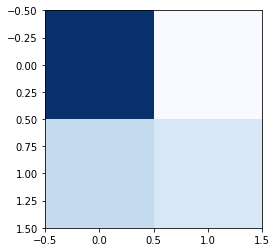

In [176]:
plt.imshow(cm, cmap='Blues')

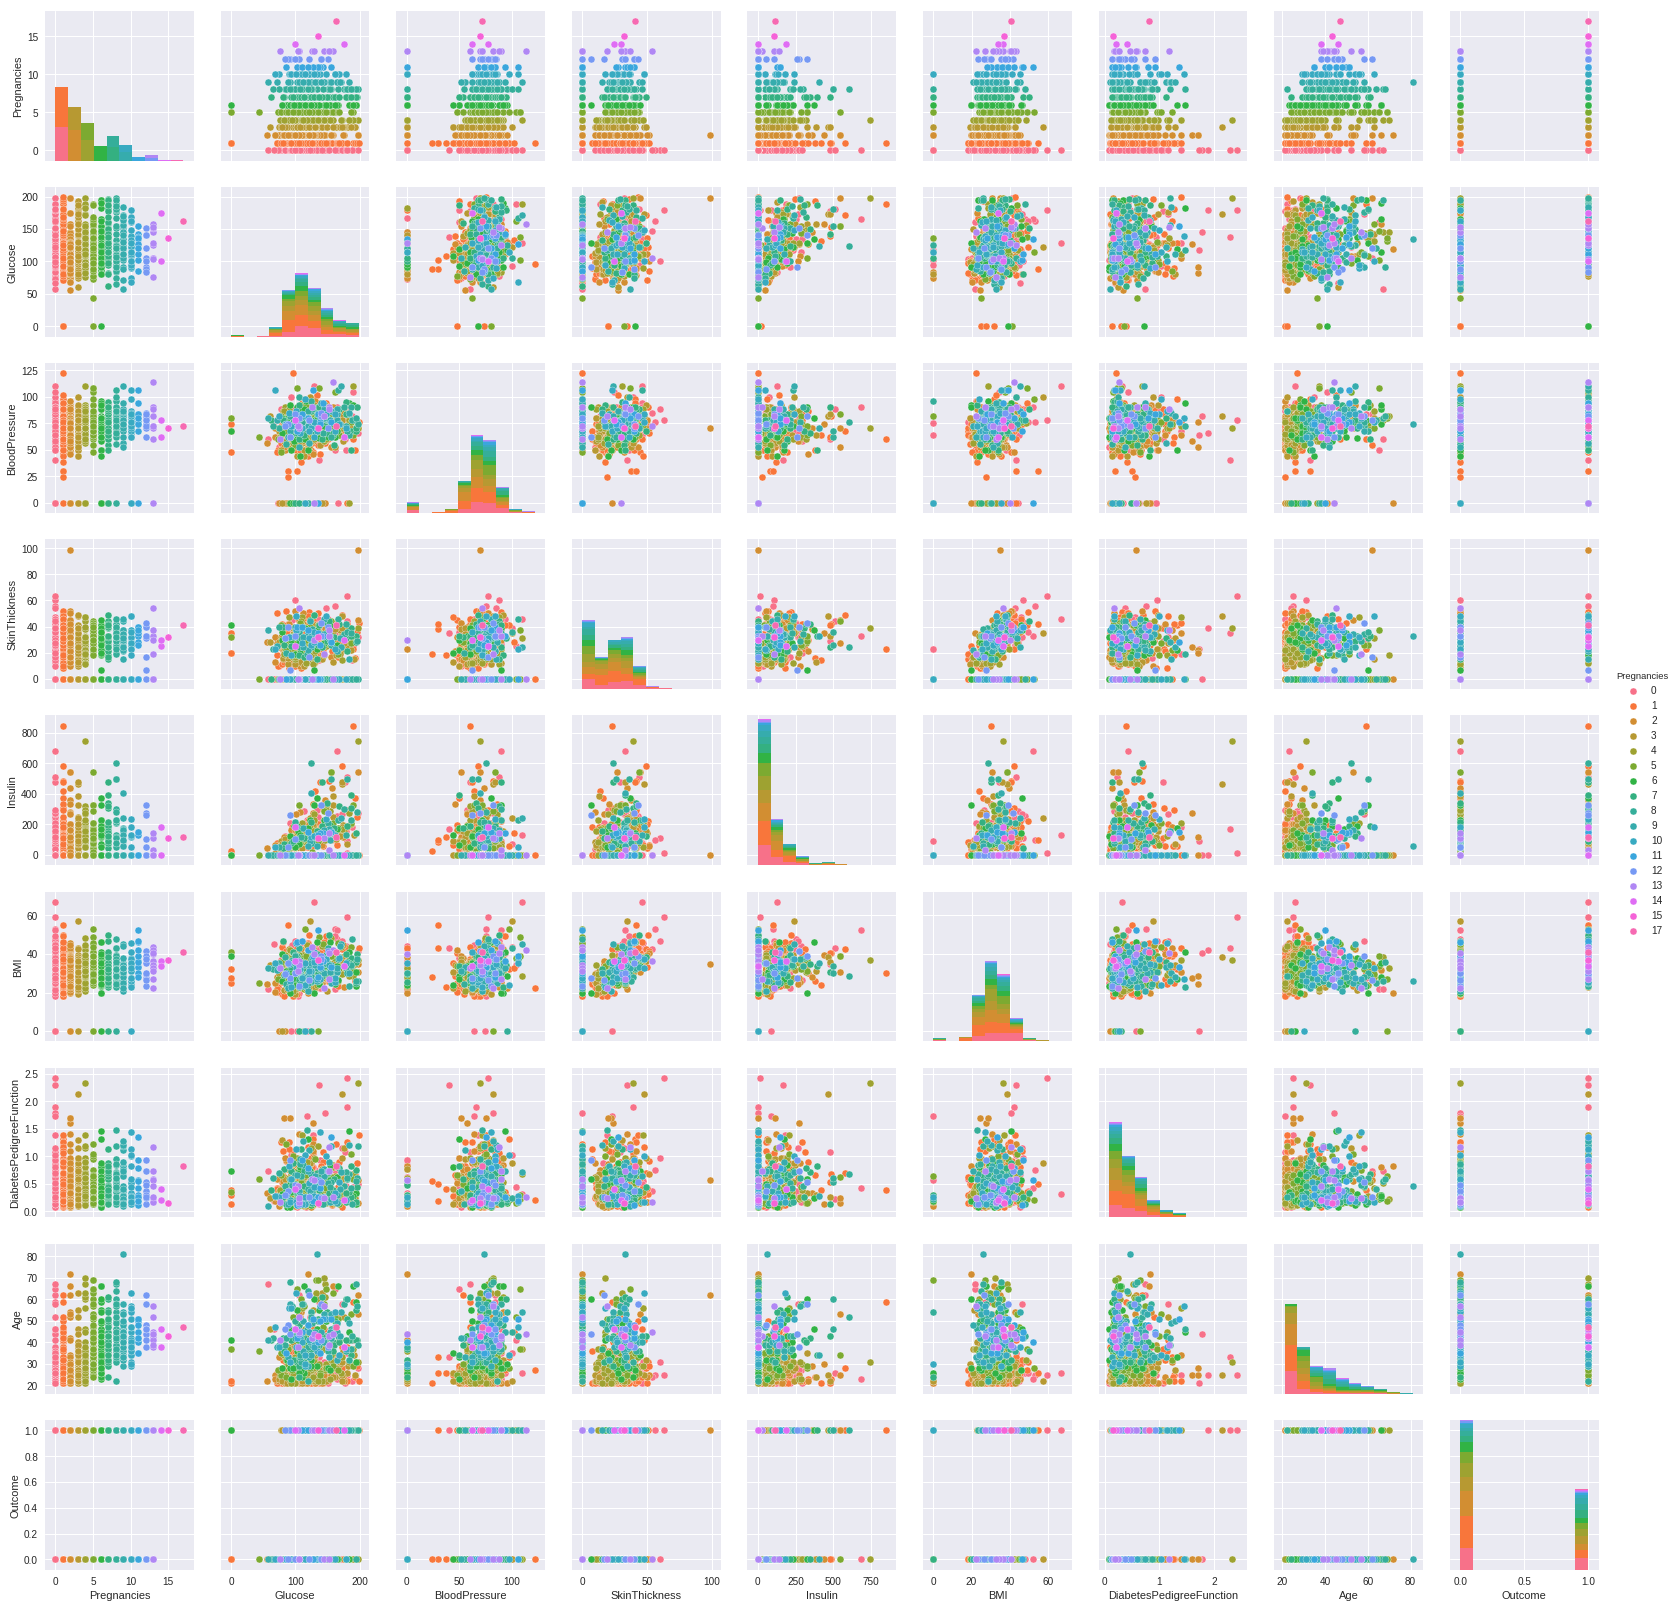

In [179]:
sns.pairplot(df, hue="Pregnancies")